# Market Basket Analysis(MBA) by Amarachi Nwodo


In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Exploratory Data Analysis 

In [3]:
df.shape

(38765, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
#To get summary statistics 
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [6]:
#checking for null values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()

759

In [8]:
#dropping the duplicates value
df = df.drop_duplicates()
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [9]:
#duplicates removed successfully from 38765rows to 38006 rows
df.duplicated().sum()

0

In [10]:
#Unique items found in the itemDescription
pd.unique(df.itemDescription)

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [11]:
#To count the number of uniques values in each column
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [12]:
df['itemDescription'].value_counts()

whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [13]:
# Convert data types
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\rachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specif

In [14]:
# To get data types of each column
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [15]:
# Time-based analysis
# Extract relevant time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [16]:
# Sales trends over time (e.g., monthly sales)
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Total Sales')
print("Monthly Sales:\n", monthly_sales)


Monthly Sales:
     Year  Month  Total Sales
0   2014      1         1486
1   2014      2         1517
2   2014      3         1465
3   2014      4         1482
4   2014      5         1608
5   2014      6         1504
6   2014      7         1603
7   2014      8         1515
8   2014      9         1333
9   2014     10         1538
10  2014     11         1478
11  2014     12         1496
12  2015      1         1787
13  2015      2         1445
14  2015      3         1736
15  2015      4         1626
16  2015      5         1668
17  2015      6         1742
18  2015      7         1609
19  2015      8         1920
20  2015      9         1585
21  2015     10         1617
22  2015     11         1730
23  2015     12         1516


In [17]:
# Popular items during specific periods
popular_items_by_month = df.groupby(['Year', 'Month', 'itemDescription']).size().reset_index(name='Item Sales')
print("Popular Items by Month:\n", popular_items_by_month)

Popular Items by Month:
       Year  Month        itemDescription  Item Sales
0     2014      1  Instant food products           5
1     2014      1               UHT-milk           9
2     2014      1       abrasive cleaner           1
3     2014      1          baking powder           5
4     2014      1                   beef          11
...    ...    ...                    ...         ...
3288  2015     12            white bread           7
3289  2015     12             white wine           5
3290  2015     12             whole milk          91
3291  2015     12                 yogurt          46
3292  2015     12               zwieback           4

[3293 rows x 4 columns]


In [18]:
# Item frequency
item_frequency = df['itemDescription'].value_counts().reset_index(name='Frequency').rename(columns={'index': 'Item'})
print("Item Frequency:\n", item_frequency)

Item Frequency:
                       Item  Frequency
0               whole milk       2363
1         other vegetables       1827
2               rolls/buns       1646
3                     soda       1453
4                   yogurt       1285
..                     ...        ...
162        rubbing alcohol          5
163                   bags          4
164         baby cosmetics          3
165        kitchen utensil          1
166  preservation products          1

[167 rows x 2 columns]


In [19]:
# Member preferences
member_preferences = df.groupby('Member_number')['itemDescription'].value_counts().unstack(fill_value=0)
print("Member Preferences:\n", member_preferences)

Member Preferences:
 itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                                 0         0                 0   
1001                                 0         0                 0   
1002                                 0         0                 0   
1003                                 0         0                 0   
1004                                 0         0                 0   
...                                ...       ...               ...   
4996                                 0         0                 0   
4997                                 0         0                 0   
4998                                 0         0                 0   
4999                                 0         0                 0   
5000                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powd

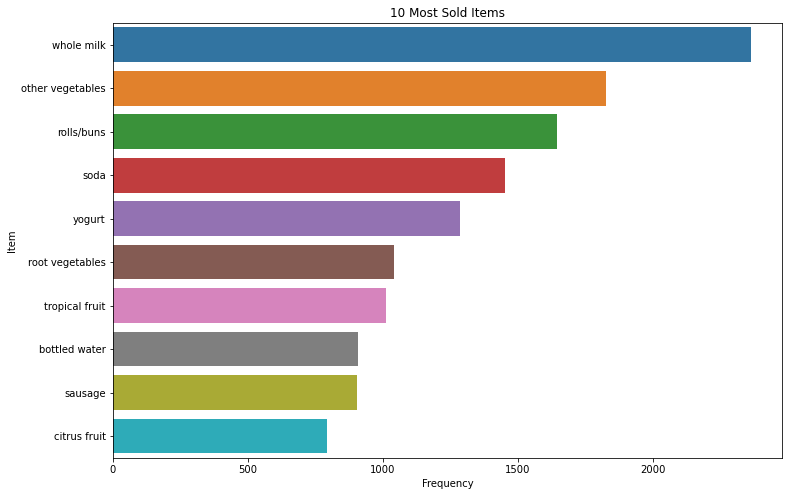

In [20]:
# Item frequency plot showing the 10 most sold items
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Item', data=item_frequency.head(10))
plt.title('10 Most Sold Items')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.show()

From the graph, whole milk was the most sold item

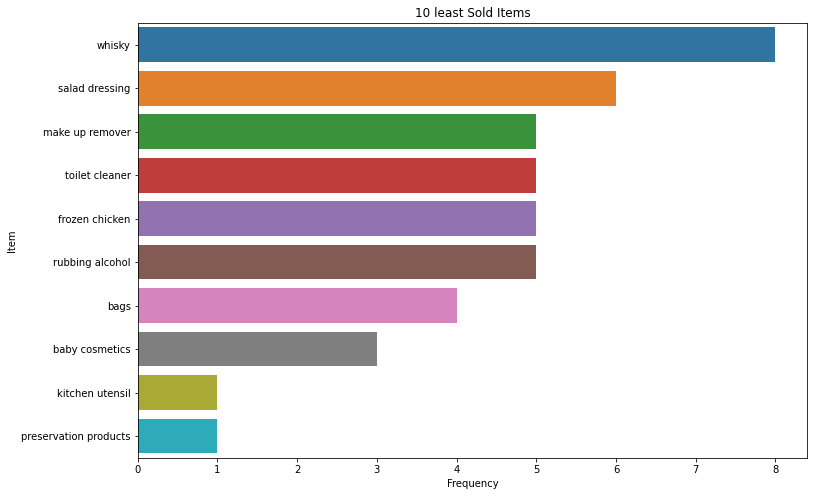

In [21]:
# Item frequency plot showing the 10 least sold items
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Item', data=item_frequency.tail(10))
plt.title('10 least Sold Items')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.show()

From the graph Kitchen utensil and preservation products were the least sold item

In [22]:
df['Day'].value_counts()[:10]

28    1347
26    1326
8     1324
13    1318
14    1316
21    1315
27    1300
10    1285
4     1282
5     1272
Name: Day, dtype: int64

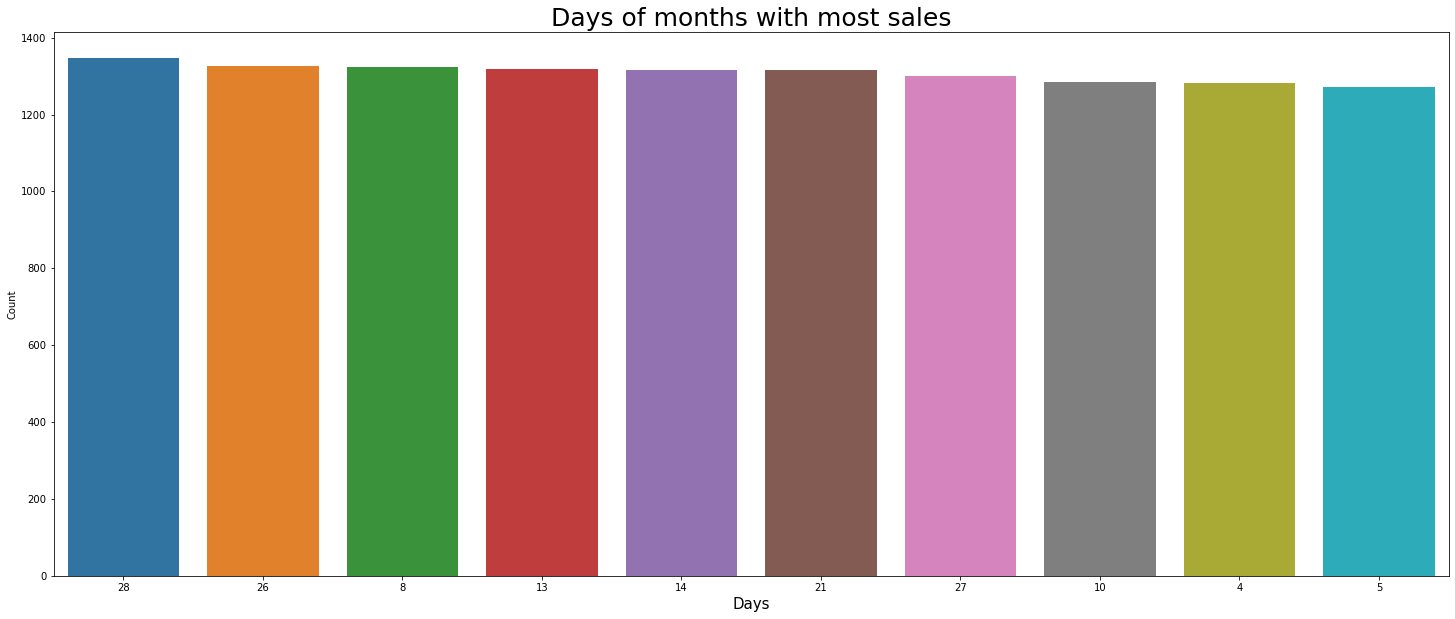

In [23]:
# Barchart showing Days of the month with the most sales
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Day',  data=df, order = [28, 26, 8,13,14,21,27,10,4,5] );
plt.title("Days of months with most sales", fontsize = 25)
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Count")

plt.show()

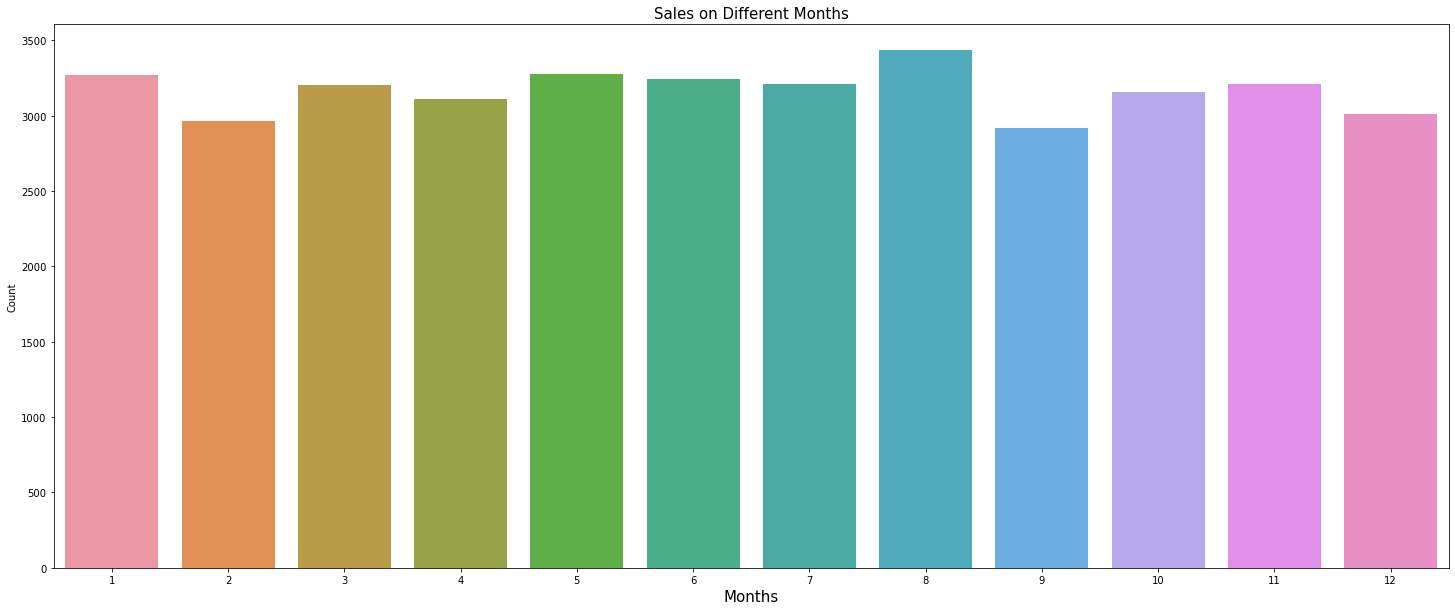

In [24]:
#Barchart showing sales on different month
plt.figure(figsize = (25,10));
t = {'fontsize': 10}
sns.countplot(x='Month',  data=df );
plt.title("Sales on Different Months", fontsize = 15)
plt.xlabel("Months", fontsize = 15)
plt.ylabel("Count")

plt.show()

From the graph, August had the most sales and the least sales was in the month of September

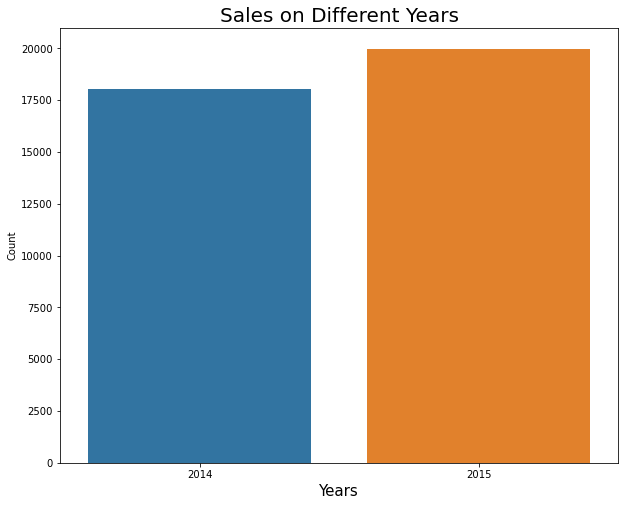

In [25]:
#Sales on different years
plt.figure(figsize = (10,8));
sns.countplot(x='Year',  data=df, );
plt.title("Sales on Different Years", fontsize = 20)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Count")

plt.show()

From the graph there was an increase in sales in the year 2015

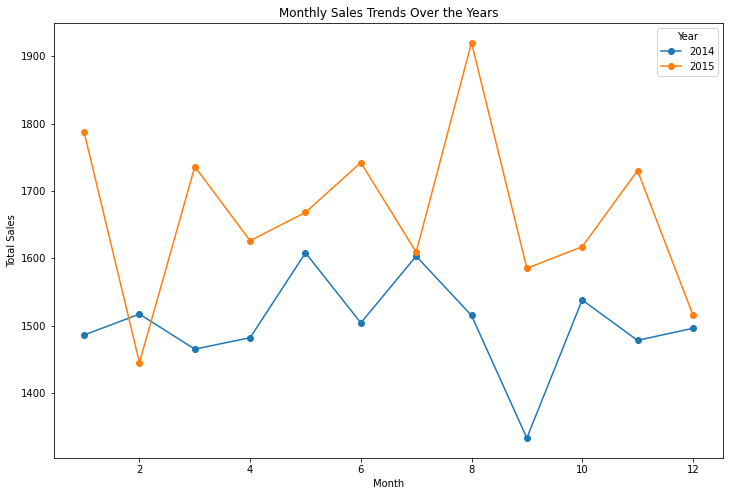

In [26]:
# Time series plot
# Monthly sales trends
monthly_sales_plot = monthly_sales.pivot(index='Month', columns='Year', values='Total Sales')
monthly_sales_plot.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Monthly Sales Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

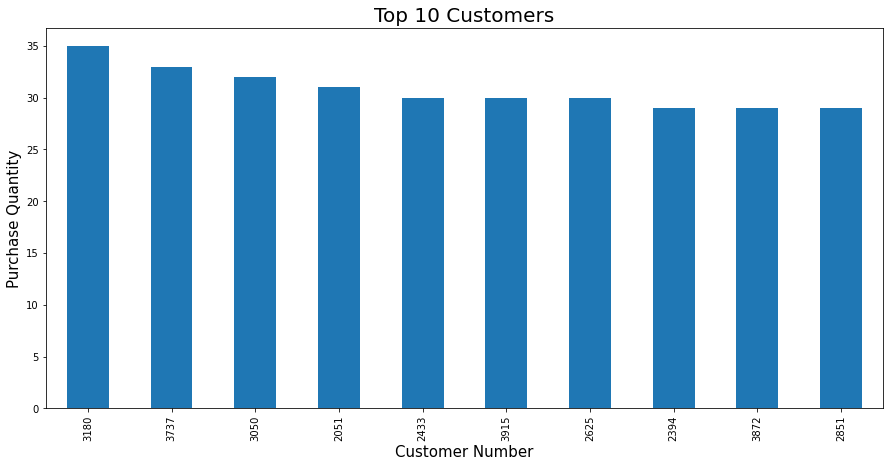

In [27]:
#number of items bought by the top 10 customers
top_10Cust = df.groupby('Member_number').agg(PurchaseQuantity=('itemDescription','count')).sort_values(by='PurchaseQuantity',ascending=False)[0:10]
top_10Cust.plot(kind='bar', figsize=(15,7), legend=None)
plt.title('Top 10 Customers', fontsize=20)
plt.xlabel('Customer Number', fontsize=15)
plt.ylabel('Purchase Quantity', fontsize=15)
plt.show()

In [28]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['itemDescription'], prefix='item')

In [29]:
# Display the first few rows of the processed dataframe
df_encoded.head()

,Member_number,Date,Year,Month,Day,item_Instant food products,item_UHT-milk,item_abrasive cleaner,item_artif. sweetener,item_baby cosmetics,...,item_turkey,item_vinegar,item_waffles,item_whipped/sour cream,item_whisky,item_white bread,item_white wine,item_whole milk,item_yogurt,item_zwieback
0,1808,2015-07-21,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,2015,9,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,2015,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Market Basket Analysis using Apriori Algorithm

In [30]:
# Convert the DataFrame to a transaction format
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')


In [31]:
# Convert the DataFrame to a Transaction format
transaction_data = df.groupby('Member_number')['itemDescription'].apply(list).reset_index(name='Transaction')
transactions = transaction_data['Transaction'].tolist()

In [32]:
#install the mlxtend library
!pip install mlxtend

In [33]:
# Association rule mining using Apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Transform transactions into a transaction matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

In [35]:
# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.1, use_colnames=True)

In [36]:
# Association rule mining
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [37]:
# Display association rules with support, confidence, and lift values
print("Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:
            antecedents         consequents   support  confidence      lift
0         (whole milk)     (bottled water)  0.112365    0.245241  1.147597
1      (bottled water)        (whole milk)  0.112365    0.525810  1.147597
2   (other vegetables)        (rolls/buns)  0.146742    0.389646  1.114335
3         (rolls/buns)  (other vegetables)  0.146742    0.419663  1.114335
4   (other vegetables)              (soda)  0.124166    0.329700  1.051695
5               (soda)  (other vegetables)  0.124166    0.396072  1.051695
6         (whole milk)  (other vegetables)  0.191380    0.417693  1.109106
7   (other vegetables)        (whole milk)  0.191380    0.508174  1.109106
8   (other vegetables)            (yogurt)  0.120318    0.319482  1.129050
9             (yogurt)  (other vegetables)  0.120318    0.425204  1.129050
10        (rolls/buns)              (soda)  0.119805    0.342627  1.092928
11              (soda)        (rolls/buns)  0.119805    0.382160  1.092928
12   

Rule 0 and Rule 1:

Antecedents: (whole milk), Consequents: (bottled water)
People who buy whole milk are 24.5% likely to buy bottled water, People who buy bottled water are 52.6% likely to buy whole milk.
Recommendation: Consider placing whole milk and bottled water together to encourage cross-sales.

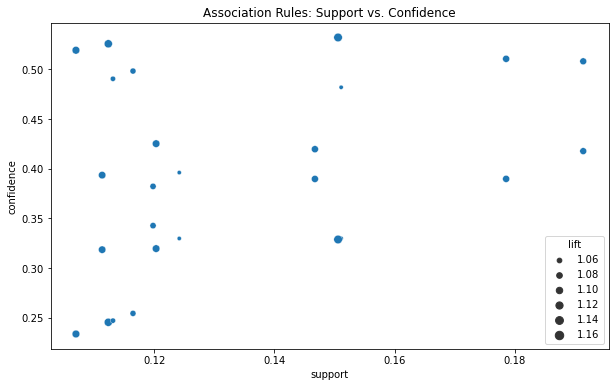

In [38]:
# Plotting a scatter plot of association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules)
plt.title('Association Rules: Support vs. Confidence')
plt.show()

Points on the scatter plot represent individual association rules.
Larger points (markers) indicate higher lift values, meaning stronger associations.
Points positioned toward the upper-right part of the plot indicate rules with both high support and high confidence.
Rule 24 and Rule 25:Antecedents:(whole milk), Consequents:(yogurt) has the highest Lift value of 1.16,People who buy whole milk are 32.87% likely to buy yogurt and People who buy yogurt are 53.22% likely to buy whole milk. This means when they are placed together sales will potentially increase.




